# Final Project: Problem Set 1

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

import os

Load Data Folders


In [14]:
train_folder = './Dataset/train/'
val_folder = './Dataset/val/'
test_folder = './Dataset/test/'

Train Data


In [15]:
train_n = train_folder+'/NORMAL/'
train_p = train_folder+'/PNEUMONIA/'

# Plotting

Text(0.5, 1.0, 'Pneumonia')

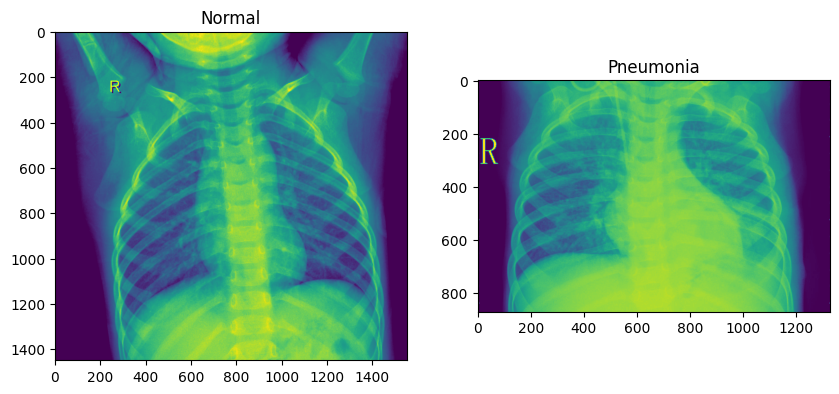

In [16]:
#Normal pic 
rand_norm = np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
norm_pic_address = train_n + norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))
pne_pic =  os.listdir(train_p)[rand_p]
pne_pic_address = train_p + pne_pic

#Ploting images
f = plt.figure(figsize= (10,6))

a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(Image.open(norm_pic_address))
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(Image.open(pne_pic_address))
a2.set_title('Pneumonia')

# Model

In [17]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Conv2D(32, (3, 3), activation="relu"))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(activation = 'relu', units = 128))
cnn_model.add(Dense(activation = 'sigmoid', units = 1))

Compile Model

In [18]:
cnn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)

train_set = train_datagen.flow_from_directory(train_folder,
                target_size = (64, 64),
                batch_size = 32,
                class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [20]:
test_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = test_datagen.flow_from_directory(val_folder,
                        target_size=(64, 64),
                        batch_size=32,
                        class_mode='binary')

test_set = test_datagen.flow_from_directory(test_folder,
            target_size = (64, 64),
            batch_size = 32,
            class_mode = 'binary')

Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Fit Model

In [9]:
cnn_model_his = cnn_model.fit_generator(train_set,
                steps_per_epoch = 163,
                epochs = 8,
                validation_data = validation_generator,
                validation_steps = 624)

C:\Users\MD Shahriar Kabir\AppData\Local\Temp\ipykernel_16844\2018619375.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model_his = cnn_model.fit_generator(train_set,


Epoch 1/8
163/163 [==============================] - 77s 468ms/step - loss: 0.3704 - accuracy: 0.8367 - val_loss: 0.3365 - val_accuracy: 0.8750
Epoch 2/8
163/163 [==============================] - 95s 581ms/step - loss: 0.2249 - accuracy: 0.9087
Epoch 3/8
163/163 [==============================] - 90s 547ms/step - loss: 0.1986 - accuracy: 0.9208
Epoch 4/8
163/163 [==============================] - 82s 502ms/step - loss: 0.1923 - accuracy: 0.9212
Epoch 5/8
163/163 [==============================] - 83s 509ms/step - loss: 0.1630 - accuracy: 0.9348
Epoch 6/8
163/163 [==============================] - 83s 512ms/step - loss: 0.1720 - accuracy: 0.9337
Epoch 7/8
163/163 [==============================] - 82s 502ms/step - loss: 0.1550 - accuracy: 0.9398
Epoch 8/8
163/163 [==============================] - 87s 535ms/step - loss: 0.1586 - accuracy: 0.9398


# Evaluate Model

Accuracy

In [21]:
test_acc = cnn_model.evaluate_generator(test_set,steps=624)
print('The testing accuracy is :',test_acc[1]*100, '%')

C:\Users\MD Shahriar Kabir\AppData\Local\Temp\ipykernel_16844\4010922054.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_acc = cnn_model.evaluate_generator(test_set,steps=624)


The testing accuracy is : 62.82051205635071 %


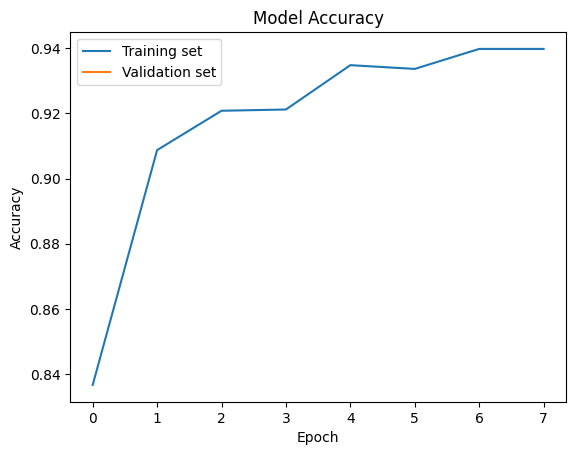

In [22]:
plt.plot(cnn_model_his.history['accuracy'])
plt.plot(cnn_model_his.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

Loss

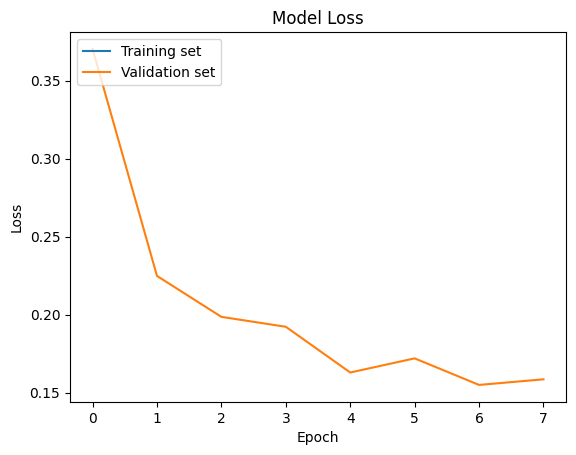

In [23]:
plt.plot(cnn_model_his.history['val_loss'])
plt.plot(cnn_model_his.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()